# COGS 108 - Final Project 

# Overview

This project is to determine whether or not there is a relationship between the quality of a park in the city of San Diego and the street overall condition index (OCI) score of the corresponding street where the park is located. After parsing through the two datasets, I was able to use a linear regression model and correlation to find the answer. The results of my project is that there is not a relationship between the quality of a San Diego park and the street OCI score.

# Name & GitHub ID

- Name: Erinna Lin
- GitHub Username: e9lin

# Research Question

Is there a relationship between the quality of the park and the overall condition index of the street where the park is located?

## Background and Prior Work

From the information that I gathered from a San Diego opinions website, the city of San Diego will be retiring a fee system that funds parks, among other public amenities (Reference 1). The city would be using the fees from developers to fund public amenities. However, this means because developers only invest in neighborhoods that are nice, only the nice, wealthy neighboorhoods would continue to be able to make improvements to the parks. However, the low-income neighborhoods would not be able to get the necessary additions and improvements to the parks in their neighborhoods because there would be less developers investing in those neighborhoods (Reference 1). This results in a perpetuated cycle that the public amenities in nice neighborhoods are constantly improving, while that of low-income neighborhoods are continually being worn down and not upgraded. This is related to my research question because public amenities and the infrastructure of the city are connected because both are budgeted from the city.

To further provide evidence that San Diego's budget affects its infrastructure, there have been a huge budget cut to the city of San Diego and COVID-19 has also heavily affected the budget of infrastructure (Reference 2). In July, the infrastructure budget of San Diego has been cut by 10% compared to last year (Reference 2). This means that the infrastructure of the city will continue to deteriorate, especially in the parts of the city that already has poor infrastructure.

There has not been a lot of prior research done on the relationship between infrastructure and public amenities in San Diego. However, because the city is planning to switch to a system that undermine the infrastructure and public amenities of low-income neighborhoods, it is important to see if there is a relationship between the quality of infrastructure and that of public amenities. Additionally, because of the economic consequences of COVID-19, there will be a funding gap of $2.16 billion for the city's infrastructure budget (Reference 3). I want to see if there is a relationship between infrastructure and public amenities that may be able to predict if this funding gap could also affect public amenities, like parks. 

References:
- 1) https://www.voiceofsandiego.org/topics/government/if-your-local-park-sucks-this-is-probably-why/
- 2) https://www.kpbs.org/news/2020/apr/30/san-diegos-infrastructure-problems-expected-grow-c/
- 3) https://inewsource.org/2020/05/06/mayor-san-diego-infrastructure-barbara-bry-todd-gloria/

# Hypothesis


My hypothesis is that there is a significant relationship between the quality of the park and the overall condition index of the street where the park is located. I would think that because both the street infrastructure and the parks are both financially cared for by the City of San Diego, in a neighborhood that has poor street infrastructure, the public amenities would be rated lower than that of a neighborhood that has well-maintained street infrastructure.

# Dataset(s)

### Dataset 1:
- Dataset Name: Yelp Data for San Diego Parks
- Link to the dataset: https://github.com/e9lin/individual_fa20/blob/master/data/yelp_SD_parks.csv
- Source: https://www.yelp.com/
- Number of observations: 833

I chose the Yelp Dataset because I wanted to use the rating system as a way to get feedback about the parks from the public. Additionally, Yelp had the address of the parks within the dataset.


### Dataset 2:
- Dataset Name: City of San Diego Streets Overall Condition Index (OCI)
- Link to the dataset: https://github.com/e9lin/individual_fa20/blob/master/data/streets_oci_2015_datasd.csv
- Source: https://data.sandiego.gov/datasets/streets-overall-condition-index/
- Number of observations: 30712

I chose the streets overall condition index because the city of San Diego provided each street and the corresponding score to keep track of the condition that the streets are in.

I plan on compare these two datasets to each other by using Yelp's park rating and the streets overall condition index to see if there is a relationship between the public's opinion on the parks and the condition of the street that the park is on.

# Setup

In [1]:
import pandas as pd
import numpy as np
import requests
import io

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# Statmodels & patsy
import patsy
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skewnorm

In [2]:
#Import California Environmental Health Screening Data csv file

url_oci = "https://raw.githubusercontent.com/e9lin/individual_fa20/master/data/streets_oci_2015_datasd.csv"
download_oci = requests.get(url_oci).content
df_oci = pd.read_csv(io.StringIO(download_oci.decode('utf-8')))

#Import Import Yelp SD Park Information csv file

url_parkinfo = "https://raw.githubusercontent.com/e9lin/individual_fa20/master/data/yelp_SD_parks.csv"
download_parkinfo = requests.get(url_parkinfo).content
df_parkinfo = pd.read_csv(io.StringIO(download_parkinfo.decode('utf-8')))

# Data Cleaning

### Yelp Parks Dataset: 

#### METHODS
1. Loop through Address Column in Park Info Dataframe; Outputs only the Street Name in a Separate List.
2. Drop all columns besides name, rating & street.
3. Add Address List back into Park Information Dataframe.
4. Remove rows that have null in Street Name.
5. Drop all columns besides name, rating & street.
6. Standardize street names to all lowercase.
7. Standardize 'ave', 'drive', 'road', 'street', 'parkway', 'trail', 'place' to 'av', 'dr', 'rd', 'st', 'pkwy', 'trl'


   - The data is not the cleanest because there were duplicates parks as well as misspelled addresses.
   - The data was given to me in a useable format as a .csv file.
   - I didn't have to pre-process the dataset.


### City of San Diego Streets Overall Condition Index (OCI):

#### METHODS
1. Drop all columns besides street & oci.
2. Combine all the repeating streets, and average the OCI score between them.
3. Standardize street names to all lowercase
4. Loop through OCI dataset to match Street Name to find OCI average score.
5. Add this score to new column in Analysis Dataframe.


   - The data is pretty clean, with the exception of many duplicate street names.
   - I found this dataset from the City of San Diego's website as a usable .csv file.
   - I didn't have to pre-process the dataset.

In [3]:
#Original Yelp Park Info Dataset Summary
df_parkinfo.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [4]:
#Loop through Address Column in Park Info Dataframe; Outputs only the Street Name in a Separate List

street_exts = ['Ave', 'St', 'Blvd', 'Pkwy', 'Dr', 'Rd', 'Way', 'Trl', 'Pl', 'Road', 'Drive', 'Street']
address_list = []
for address in df_parkinfo['address']:
    address_array = address.split()
    if 'San Diego' not in address:
        address_list.append(np.nan)
    elif 'Calle' in address:
        address_list.append(address[address.find('Calle'):address.find('San Diego')])
    elif 'Via' in address:
        address_list.append(address[address.find('Via'):address.find('San Diego')])
    elif address_array[1] == 'Camino':
        if 'Ste' in address:
            address_list.append(address[address.find('Camino'):address.find('Ste')])
        else:
            address_list.append(address[address.find('Camino'):address.find('San Diego')])
    elif 'El' in address:
        if 'Ste' in address:
            address_list.append(address[address.find('El'):address.find('Ste')])
        else:
            address_list.append(address[address.find('El'):address.find('San Diego')])
    elif address_array[0].replace('-','').isdigit():
        concat_address = ''
        correct_format = False
        for x in range(1,len(address_array)):
            if address_array[x] in street_exts:
                concat_address = concat_address + ' ' + address_array[x]
                address_list.append(concat_address.strip())
                correct_format = True
                break
            elif address_array[x] == 'Ste' :
                address_list.append(concat_address.strip())
                correct_format = True
                break
            else:
                concat_address = concat_address + ' ' + address_array[x]
        if not correct_format:
            address_list.append(np.nan)
    elif not address_array[0].replace('-','').isdigit():
        concat_address = ''
        correct_format = False
        for x in range(0,len(address_array)):
            if (x == 0 or x == 1) and address_array[x].lower() == 'and' :
                continue
            if x == 0:
                if  address_array[x].lower() == 'and' or address_array[1].lower() == 'and': 
                    continue
            if x == 0 and '/' in address_array[x]:
                continue
            if address_array[x] in street_exts:
                concat_address = concat_address + ' ' + address_array[x]
                address_list.append(concat_address.strip())
                correct_format = True
                break
            elif address_array[x] == 'Ste' :
                address_list.append(concat_address.strip())
                correct_format = True
                break
            else:
                concat_address = concat_address + ' ' + address_array[x]
        if not correct_format:
            address_list.append(np.nan)
    else:
        address_list.append(np.nan)

In [5]:
#Print column names to find which to drop in Park Info dataset.

print (df_parkinfo.columns)

Index(['name', 'address', 'phone', 'id', 'url', 'rating', 'review_count',
       'longitude', 'latitude', 'is_closed'],
      dtype='object')


In [6]:
#Drop all columns besides name, rating & street in Parks Info dataset.

df_parkinfo = df_parkinfo.drop(columns = ['address', 'phone', 'id', 'url', 'review_count', 'longitude',
                                          'latitude', 'is_closed'])

In [7]:
#Add Address List back into Park Information Dataframe.

df_parkinfo['street'] = address_list
df_parkinfo.head()

,name,rating,street
0,Balboa Park,5.0,El Prado
1,Civita Park,4.5,Civita Blvd
2,Waterfront Park,4.5,NaN
3,Trolley Barn Park,4.5,Adams Ave
4,Bay View Park,5.0,NaN


In [8]:
#Remove rows that have null in Street Name & reset index in Park Info dataset.

df_parkinfo = df_parkinfo.dropna()
df_parkinfo = df_parkinfo.reset_index(drop=True)
df_parkinfo.head()

,name,rating,street
0,Balboa Park,5.0,El Prado
1,Civita Park,4.5,Civita Blvd
2,Trolley Barn Park,4.5,Adams Ave
3,Centrum Park,3.5,Lightwave Ave
4,Presidio Park,4.5,Jackson St


In [9]:
#Standardize street names to all lowercase in Park Info dataset.

df_parkinfo['street'] = df_parkinfo['street'].str.lower()
df_parkinfo.head()

,name,rating,street
0,Balboa Park,5.0,el prado
1,Civita Park,4.5,civita blvd
2,Trolley Barn Park,4.5,adams ave
3,Centrum Park,3.5,lightwave ave
4,Presidio Park,4.5,jackson st


In [10]:
#Function to standardize street extension (ave, drive, etc.)
def standardize_street_ext(string):
    
    string = string.lower()
    string = string.strip()
    
    if 'ave' in string:
        output = string.replace('ave', 'av')
    elif 'drive' in string:
        output = string.replace('drive', 'dr')
    elif 'road' in string:
        output = string.replace('road', 'rd')
    elif 'street' in string:
        output = string.replace('street', 'st')
    elif 'parkway' in string:
        output = string.replace('parkway', 'pkwy')
    elif 'trail' in string:
        output = string.replace('trail','trl')
    elif 'place' in string:
        output = string.replace('place','plc')
    else:
        output = string
    
    return output

In [11]:
#Standardize street extension in Park Info dataset.

df_parkinfo['street'] = df_parkinfo['street'].apply(standardize_street_ext)
df_parkinfo.head()

,name,rating,street
0,Balboa Park,5.0,el prado
1,Civita Park,4.5,civita blvd
2,Trolley Barn Park,4.5,adams av
3,Centrum Park,3.5,lightwav av
4,Presidio Park,4.5,jackson st


In [12]:
#Function to Standardize numerical street names.
def standardize_num_street(string):
    
    string = string.lower()
    string = string.strip()
    
    if string.find('0') == 0:
        output = string[1:]
    else:
        output = string
    
    return output

In [13]:
#Standardize numerical street names in Park Info dataset.

df_parkinfo['street'] = df_parkinfo['street'].apply(standardize_num_street)
df_parkinfo.head()

,name,rating,street
0,Balboa Park,5.0,el prado
1,Civita Park,4.5,civita blvd
2,Trolley Barn Park,4.5,adams av
3,Centrum Park,3.5,lightwav av
4,Presidio Park,4.5,jackson st


In [14]:
#Reorder columns in Parks Info dataset.

df_parkinfo = df_parkinfo[['name', 'street', 'rating']]
df_oci = df_oci.reset_index(drop=True)
df_parkinfo.head()

,name,street,rating
0,Balboa Park,el prado,5.0
1,Civita Park,civita blvd,4.5
2,Trolley Barn Park,adams av,4.5
3,Centrum Park,lightwav av,3.5
4,Presidio Park,jackson st,4.5


In [15]:
#Original City of San Diego Street OCI Dataset Summary
df_oci.head()

,seg_id,oci,street,street_from,street_to,seg_length_ft,seg_width_ft,func_class,pvm_class,area_sq_ft,oci_desc,oci_wt
0,SA-000003,65.14,ALLEY,NaN,NaN,772.7258,30.0,Alley,PCC Jointed Concrete,23181.774,Fair,1.510061e+06
1,SA-000004,67.45,ALLEY,NaN,NaN,196.0025,30.0,Alley,PCC Jointed Concrete,5880.075,Fair,3.966111e+05
2,SA-000005,70.88,ALLEY,NaN,NaN,395.0049,30.0,Alley,PCC Jointed Concrete,11850.147,Good,8.399384e+05
3,SA-000006,84.00,ALLEY,NaN,NaN,192.0025,30.0,Alley,PCC Jointed Concrete,5760.075,Good,4.838463e+05
4,SA-000008,79.24,ALLEY,NaN,NaN,251.7540,30.0,Alley,PCC Jointed Concrete,7552.620,Good,5.984696e+05


In [16]:
#Drop all columns besides street & oci in OCI dataset

df_oci = df_oci.drop(columns = ['seg_id', 'street_from', 'street_to', 'seg_length_ft', 'seg_width_ft',
                                'func_class', 'pvm_class', 'area_sq_ft', 'oci_desc', 'oci_wt'])
df_oci.head()

,oci,street
0,65.14,ALLEY
1,67.45,ALLEY
2,70.88,ALLEY
3,84.00,ALLEY
4,79.24,ALLEY


In [17]:
#Combine all the repeating streets, and average the OCI score between them.

df_oci = df_oci.groupby('street'). mean()
df_oci = df_oci.reset_index(drop=False)
df_oci.head()

,street,oci
0,01ST AV,69.884865
1,02ND AV,70.527083
2,03RD AV,68.674108
3,04TH AV,75.434667
4,05TH AV,83.127689


In [18]:
#Standardize street names to all lowercase in OCI dataset.

df_oci['street'] = df_oci['street'].str.lower()
df_oci.head()

,street,oci
0,01st av,69.884865
1,02nd av,70.527083
2,03rd av,68.674108
3,04th av,75.434667
4,05th av,83.127689


In [19]:
#Standardize street extension in OCI dataset.
df_oci['street'] = df_oci['street'].apply(standardize_street_ext)
df_oci.head()

,street,oci
0,01st av,69.884865
1,02nd av,70.527083
2,03rd av,68.674108
3,04th av,75.434667
4,05th av,83.127689


In [20]:
#Standardize numerical street names in OCI dataset.

df_oci['street'] = df_oci['street'].apply(standardize_num_street)
df_oci.head()

,street,oci
0,1st av,69.884865
1,2nd av,70.527083
2,3rd av,68.674108
3,4th av,75.434667
4,5th av,83.127689


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

#### Method
1. Duplicate Park Info dataframe to create Analysis dataframe
2. Turn OCI dataframe columns into lists.
3. Loop through each row in streets column of Analysis dataframe to find corresponding OCI score. Add corresponding OCI scores to a new list.
4. Add new list of corresponding OCI scores to a new column in Analysis dataframe.
5. Drop all rows that has null values.

In [21]:
#Duplicate Park Info to make Analysis Dataframe
df_analysis = df_parkinfo
df_analysis.head()

,name,street,rating
0,Balboa Park,el prado,5.0
1,Civita Park,civita blvd,4.5
2,Trolley Barn Park,adams av,4.5
3,Centrum Park,lightwav av,3.5
4,Presidio Park,jackson st,4.5


In [22]:
#Turn OCI dataframe columns into lists.
oci_street_list = df_oci['street'].tolist()
oci_scores_list = df_oci['oci'].tolist()

In [23]:
#Add OCI scores for corresponding streets into new list.
new_oci_list = []

for street in df_analysis['street']:
    if street in oci_street_list:
        new_oci_list.append(oci_scores_list[oci_street_list.index(street)])
    else:
        new_oci_list.append(np.nan)

In [24]:
#Create new column from corresponding OCI scores in Analysis Dataframe.

df_analysis['oci'] = new_oci_list
df_analysis.head()

,name,street,rating,oci
0,Balboa Park,el prado,5.0,80.710000
1,Civita Park,civita blvd,4.5,NaN
2,Trolley Barn Park,adams av,4.5,78.565681
3,Centrum Park,lightwav av,3.5,87.347333
4,Presidio Park,jackson st,4.5,54.077000


In [25]:
#Remove rows that have null in oci & reset index in Analysis Dataframe.

df_analysis = df_analysis.dropna()
df_analysis = df_analysis.reset_index(drop=True)
df_analysis.head()

,name,street,rating,oci
0,Balboa Park,el prado,5.0,80.710000
1,Trolley Barn Park,adams av,4.5,78.565681
2,Centrum Park,lightwav av,3.5,87.347333
3,Presidio Park,jackson st,4.5,54.077000
4,Kate O Sessions Memorial Park,soledad rd,4.5,61.263846


## Data Visualizations

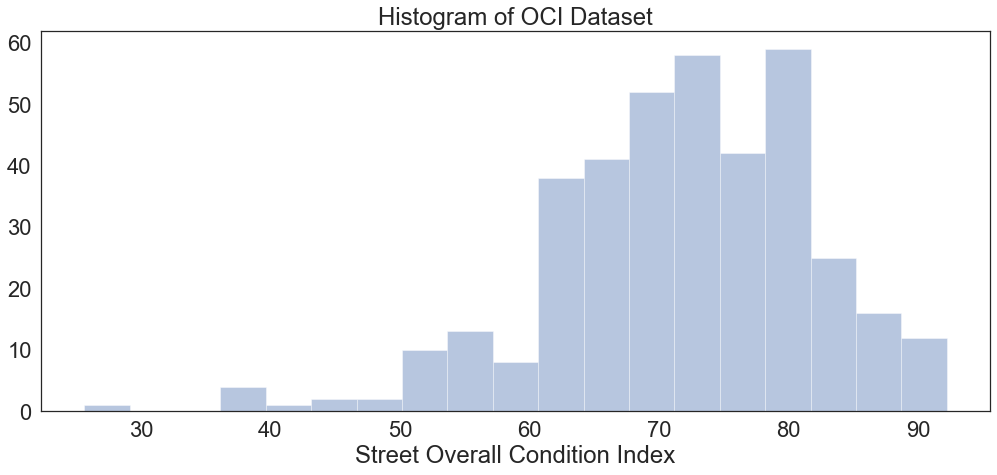

In [26]:
#Histogram of the OCI dataset
histogram_oci = sns.distplot(df_analysis['oci'], kde = False)
histogram_oci.set(xlabel= 'Street Overall Condition Index')
histogram_oci.set_title('Histogram of OCI Dataset');

The histogram above displays the amount of the OCI scores that were given to the streets of San Diego. This shows that the city of San Diego gives a score over 50 for the majority of their streets. This implies that the streets within San Diego are in better-than-average condition.

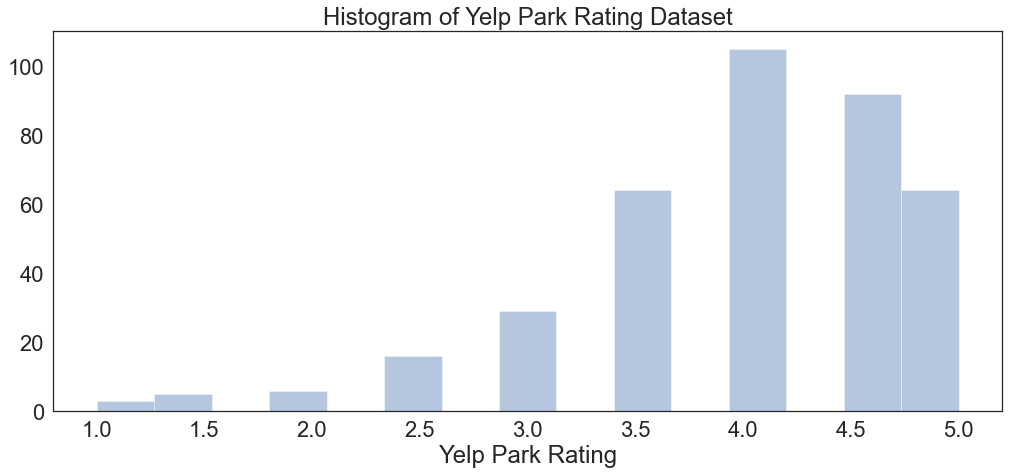

In [27]:
#Histogram of the Yelp Parks Rating dataset
histogram_yelp = sns.distplot(df_analysis['rating'], kde = False)
histogram_yelp.set(xlabel= 'Yelp Park Rating')
histogram_yelp.set_title('Histogram of Yelp Park Rating Dataset');

The histogram above displays the Yelp ratings of parks within the city of San Diego. This shows that the majority of the parks are rated above 2.5, which implies that the parks within San Diego are better than average by the public's standard.

## Results

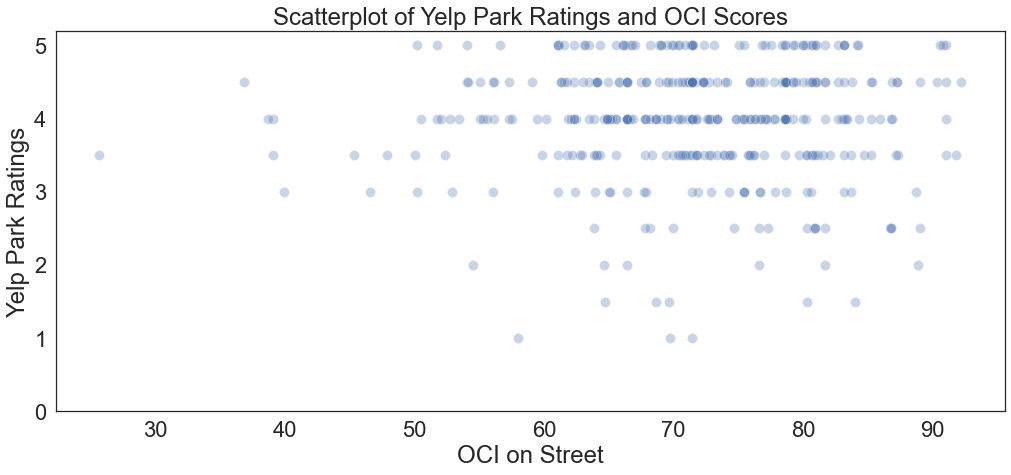

In [28]:
#Plot a scatterplot of OCI scores and Yelp Ratings from the Analysis Dataframe.
    
scatterplot = sns.scatterplot(x='oci', y='rating', alpha=0.3, data=df_analysis, s=100)
plt.ylim(ymin=0)
plt.xlabel('OCI on Street')
plt.ylabel('Yelp Park Ratings')
scatterplot.set_title('Scatterplot of Yelp Park Ratings and OCI Scores');

In [29]:
#whether OCI Score (predictor) impacts Yelp Rating (outcome).
outcome, predictors = patsy.dmatrices('rating ~ oci', df_analysis)

In [30]:
#run and fit model
mod = sm.OLS(outcome, predictors)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.02054
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.886
Time:                        00:48:23   Log-Likelihood:                -462.51
No. Observations:                 384   AIC:                             929.0
Df Residuals:                     382   BIC:                             936.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9364      0.293     13.456      0.0

If the OCI Score was 0, the Yelp Rating would be 3.9364. For every 1 unit increase in OCI Score, you expect to see a 0.0006 unit increase in Yelp Rating. In addition to this, the p-Value is 0.886, which is much higher than my alpha of 0.01. This means that the streets OCI score cannot significantly predict the Yelp ratings of parks on the corresponding street.

## Correlation

In [31]:
#Correlation between OCI & Rating
corrs = df_analysis.corr()
corrs

,rating,oci
rating,1.000000,0.007333
oci,0.007333,1.000000


The correlation between the OCI street scores and the Yelp ratings of parks along the corresponding streets is 0.0073, which shows that there is little to no correlation between the two variables.

# Ethics & Privacy

Because both of my datasets were published to the public, I had permission to use them for my project. There were not privacy concerns with both of my datasets because I did not use any private information from either datasets, since I dropped any of the columns that may have had phone numbers, or specific addresses. The potential biases that the OCI dataset could have is because the data is collected by the city emmployees, there could be a bias to score the streets higher than they should be scored so that there would be less streets that would need to be budgeted to be fixed. Additionally, the Yelp parks rating dataset could potentially contain human biases because each park rating is composed of many individual human responses. 

# Conclusion & Discussion

The main goal of my project is to answer my research question of whether there is a relationship between the Yelp park ratings and City of San Diego's Streets Overall Conditions Index scores. I used a dataset from Yelp that included the address as well as the rating of each park and a dataset from the City of San Diego that included street names within San Diego as well as the corresponding street overall conditions index (OCI) scores. My analysis included histograms of each dataset, a scatterplot of the datasets compared to each other, and a linear regressions model. My results included a p-Value of 0.886 and a correlation of 0.0073. From my results, I concluded that there was very little to no correlation between the two datasets. I also concluded that the streets OCI scores cannotsignificantly predict the Yelp ratings of parks on the corresponding street.

A limitation to the Yelp park rating dataset that used was that the Yelp ratings are not precise decimals that are the average of all of the individual ratings. This means that the only values that Yelp ratings dataset would have are between 1 and 5 in 0.5 increments, which does not allow for precise comparison between the OCI scores and the Yelp park ratings. The impact of this project is that it shows that there is no correlation between the quality of the street infrastructure and the quality of the parks that are on the corresponding streets. This may imply that despite poor street infrastructure, the quality of public amenities like parks could still be in high quality.